In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [2]:
def laplacian(image, kernel):
    m, n = image.shape
    laplacian = np.zeros((m, n))

    for i in range(2, m - 1):
        for j in range(2, n - 1):
            d1 = (kernel[0, 0] * image[i - 1, j - 1] + kernel[0, 1] * image[i - 1, j] + kernel[0, 2] * 
                  image[i - 1, j + 1] + kernel[1, 0] * image[i, j - 1] + kernel[1, 1] * image[i, j] + 
                  kernel[1, 2] * image[i, j + 1] + kernel[2, 0] * image[i + 1, j - 1] + kernel[2, 1] *
                  image[i + 1, j] + kernel[2, 2] * image[i + 1, j + 1])
            laplacian[i, j] = (d1)

    for i in range(m):
        for j in range(n):
            if laplacian[i, j] > 30:
                laplacian[i, j] = 255
            else:
                laplacian[i, j] = 0

    return laplacian


In [3]:
def kirsch(image):
    m, n = image.shape
    list = []
    kirsch = np.zeros((m, n))
    for i in range(2, m - 1):
        for j in range(2, n - 1):
            d1 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                           3 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                           3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d2 = np.square((-3) * image[i - 1, j - 1] + 5 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                           3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                           3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d3 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] + 5 * image[i - 1, j + 1] -
                           3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                           3 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d4 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] -
                           3 * image[i, j - 1] + 5 * image[i, j + 1] - 3 * image[i + 1, j - 1] +
                           5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d5 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] - 3
                           * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                           5 * image[i + 1, j] + 5 * image[i + 1, j + 1])
            d6 = np.square((-3) * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                           5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] +
                           5 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d7 = np.square(5 * image[i - 1, j - 1] - 3 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                           5 * image[i, j - 1] - 3 * image[i, j + 1] + 5 * image[i + 1, j - 1] -
                           3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            d8 = np.square(5 * image[i - 1, j - 1] + 5 * image[i - 1, j] - 3 * image[i - 1, j + 1] +
                           5 * image[i, j - 1] - 3 * image[i, j + 1] - 3 * image[i + 1, j - 1] -
                           3 * image[i + 1, j] - 3 * image[i + 1, j + 1])
            # Take the maximum value in each direction, the effect is not good, use another method
            list = [d1, d2, d3, d4, d5, d6, d7, d8]
            kirsch[i, j] = int(np.sqrt(max(list)))
            # : Rounding the die length in all directions
            # kirsch[i, j] = int(np.sqrt(d1 + d2 + d3 + d4 + d5 + d6 + d7 + d8))
    for i in range(m):
        for j in range(n):
            if kirsch[i, j] > 150:
                kirsch[i, j] = 255
            else:
                kirsch[i, j] = 0
    return kirsch


In [4]:
image1 = cv2.imread('low detailed.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('high detailed.jpg', cv2.IMREAD_GRAYSCALE)
image3 = cv2.imread('low contrast.jpg', cv2.IMREAD_GRAYSCALE)
image4 = cv2.imread('high contrast.jpg', cv2.IMREAD_GRAYSCALE)

In [5]:
krnl_lp_1 = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]])


In [6]:
low_detailed_lapl = laplacian(image1, kernel=krnl_lp_1)
low_detailed_kirsch = kirsch(image1)
high_detailed_lapl = laplacian(image2, kernel=krnl_lp_1)
high_detailed_kirsch = kirsch(image2)
low_contrast_lapl = laplacian(image3, kernel=krnl_lp_1)
low_contrast_kirsch = kirsch(image3)
high_contrast_lapl = laplacian(image4, kernel=krnl_lp_1)
high_contrast_kirsch = kirsch(image4)




# output_4 = cv2.filter2D(image1, -1, krnl_lp_1)
# cv2.imshow('Original image', image1)
# cv2.imshow('image1', output)
# cv2.imshow('image2', output_4)
# if cv2.waitKey(0) & 0xFF == 27:
#     cv2.destroyAllWindows()

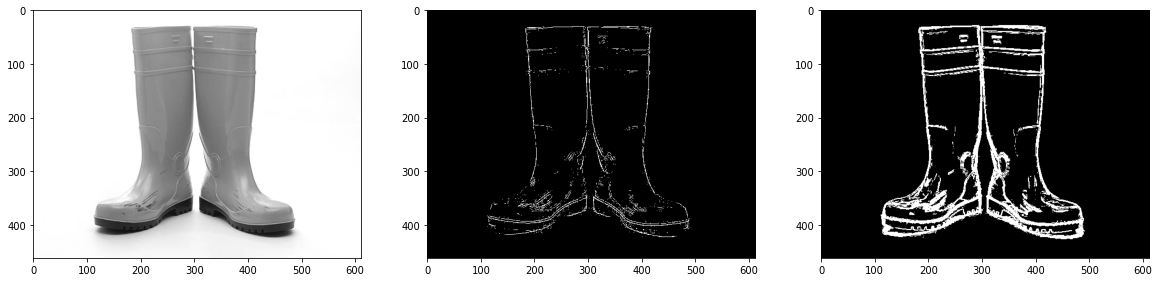

In [7]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(20,15))
ax1.imshow(image1,cmap='gray')
ax2.imshow(low_detailed_lapl, cmap='gray')
ax3.imshow(low_detailed_kirsch, cmap='gray')
plt.show()


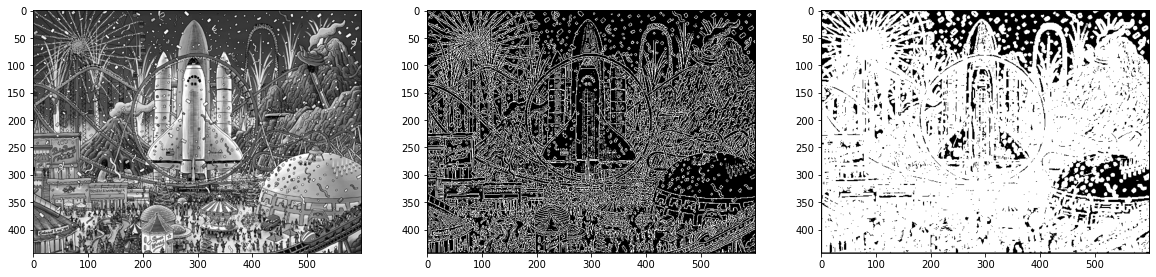

In [8]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(20,15))
ax1.imshow(image2,cmap='gray')
ax2.imshow(high_detailed_lapl, cmap='gray')
ax3.imshow(high_detailed_kirsch, cmap='gray')
plt.show()

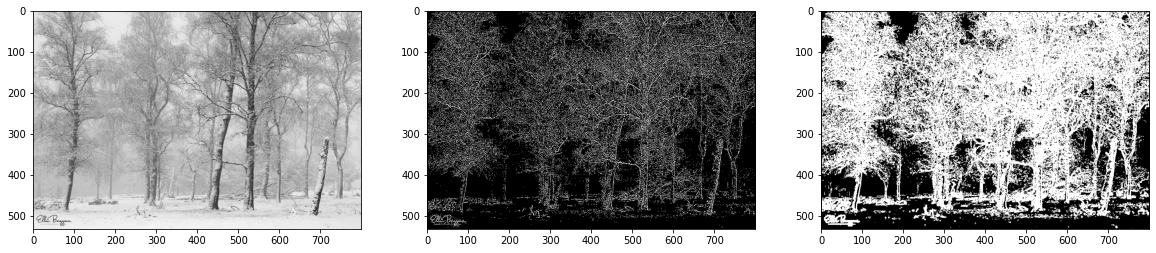

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(20,15))
ax1.imshow(image3,cmap='gray')
ax2.imshow(low_contrast_lapl, cmap='gray')
ax3.imshow(low_contrast_kirsch, cmap='gray')
plt.show()

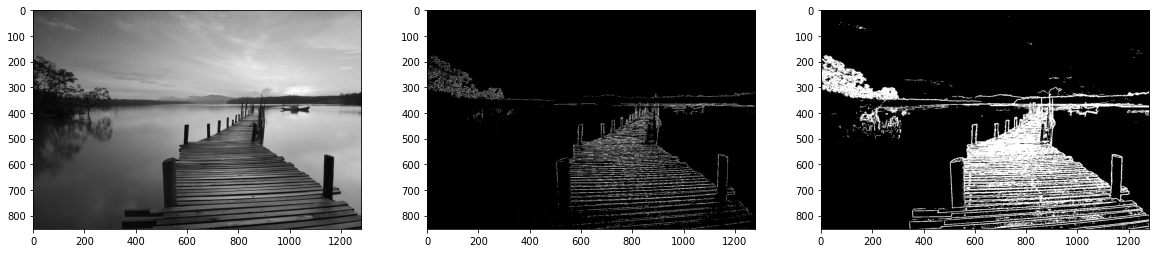

In [10]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3, figsize=(20,15))
ax1.imshow(image4,cmap='gray')
ax2.imshow(high_contrast_lapl, cmap='gray')
ax3.imshow(high_contrast_kirsch, cmap='gray')
plt.show()